# 4IZ566 - DS Project - Classification Part

### Authors
- Adam Hospodka - `hosa04@vse.cz`
- Vítězslav Slavík - `slav02@vse.cz`

### Python Version
3.7

### Packages
viz requirements.txt
- Numpy
- Matplotlib
- Seaborn
- Scikit-Learn
- Keras (Tensorflow BE)

## Data Description
This dataset is called *Online Shopper's Intention* and comes from *kaggle.com* website.

**Source** : https://www.kaggle.com/roshansharma/online-shoppers-intention

The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session 
would belong to a different user in a 1-year period to avoid 
any tendency to a specific campaign, special day, user 
profile, or period.

<img src="images/data-meta.png" alt="Drawing" style="width: 400px;"/>

### The dataset consists of 10 numerical and 8 categorical attributes

**The 'Revenue' attribute**
can be used as the class label. 

**"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration"** 
represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.  
The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

**The "Bounce Rate", "Exit Rate" and "Page Value" features** 
represent the metrics measured by "Google Analytics" for each page in the e-commerce site. In this case, we are thinking that in our case those rates has been agregated from all pages customer went throught, but it wasn't explicitly described anywhere.

**The value of "Bounce Rate" feature for a web page** 
refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.

**The value of "Exit Rate" feature for a specific web page**
is calculated as for all pageviews to the page, the percentage that were the last in the session. 

**The "Page Value" feature**
represents the average value for a web page that a user visited before completing an e-commerce transaction. 

**The "Special Day" feature** 
indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. 
The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

## Goals for analysis
- perform an EDA and get familiar with the data (placed in the second jup notebook)
- find a model that is able to predict if the customer is about to buy something. It will improve the ability of marketing campaign to target relevant customer and can lead to real time offering to support the better conversion.

## Global Variables

In [1]:
RANDOM_STATE = 3
TARGET_VARIABLE = 'Revenue'
TEST_SIZE = 0.3

# Imports

In [2]:
# Supress Notebook Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [3]:
df_raw = pd.read_csv('data/online_shoppers_intention.csv', delimiter=',')
df_raw.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3.0,145.0,0.0,0.0,53.0,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.0,0.0,0.0,0.0,5.0,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.0,0.0,0.0,0.0,6.0,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4.0,75.0,0.0,0.0,15.0,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.0,0.0,0.0,0.0,3.0,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


### Check for null values

In [4]:
# Show counter for null values
df_raw.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [5]:
df_raw.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
# Rows with negative duration
print('Problematic Rows Count:',df_raw[df_raw['Informational_Duration'] < 0].count()[1])

Problematic Rows Count: 33


## Cleaning Data

In [7]:
# remove rows with null & negative value
df = df_raw[((df_raw['Administrative_Duration'] >= 0) & (df_raw['Informational_Duration'] >= 0) & (df_raw['ProductRelated_Duration'] >= 0))].copy()

## Data Preparation

Including
- binarization of columns
- creating dummy variables from categorical columns
- binning variables

In [8]:
# From string to number
df['Month']= df['Month'].astype('category').cat.codes
df['Month'].value_counts()

6    3357
7    2995
5    1884
1    1727
8     549
9     448
0     433
3     431
4     288
2     171
Name: Month, dtype: int64

#### Binary Encoding

In [9]:
# Binary Encoding
from sklearn.preprocessing import label_binarize

# From Label to Boolean
df['Revenue'] = label_binarize(df['Revenue'], classes=[False,True])
df['Weekend'] = label_binarize(df['Weekend'], classes=[False,True])

In [10]:
df_raw[['Revenue', 'Weekend']].tail()

,Revenue,Weekend
12325,False,True
12326,False,True
12327,False,True
12328,False,False
12329,False,True


#### Create Boolean Cols from Cardinal

In [11]:
# Boolean - Visited the type of page
df['Administrative_Visited'] = np.where(df['Administrative'] > 1, 1,0)
df['Informational_Visited'] = np.where(df['Informational'] > 1, 1,0)
df['ProductRelated_Visited'] = np.where(df['ProductRelated'] > 1, 1,0)

In [12]:
df['IsSpecialDate'] = np.where(df['SpecialDay'] > 1, 1,0)

#### Binning
Create intervals and merge one with low count of values

In [13]:
# Administrative
column_name = 'Administrative'
interval_step = 3
new_column_name = column_name + '_Bins'
interval = range(0, int(max(df[column_name])), interval_step)
max_number_of_intervals =  10

# Create Column
df[new_column_name] = pd.cut(df[column_name], interval, right=False)
df[new_column_name] = df[new_column_name].astype('category').cat.codes
df.loc[(df[new_column_name].astype('category').cat.codes >= max_number_of_intervals),new_column_name] = max_number_of_intervals
df[new_column_name].value_counts()

 0    8189
 1    2255
 2    1057
 3     483
 4     186
 5      78
 6      20
 7       9
-1       6
Name: Administrative_Bins, dtype: int64

In [14]:
# ProductRelated
column_name = 'ProductRelated'
interval_step = 30
new_column_name = column_name + '_Bins'
interval = range(0, int(max(df[column_name])), interval_step)
max_number_of_intervals =  10

# Create Column
df[new_column_name] = pd.cut(df[column_name], interval, right=False)
df[new_column_name] = df[new_column_name].astype('category').cat.codes
df.loc[(df[new_column_name].astype('category').cat.codes >= max_number_of_intervals),new_column_name] = max_number_of_intervals
df[new_column_name].value_counts()

 0     8235
 1     2329
 2      826
 3      380
 4      201
 5      120
 10      70
 6       53
 7       46
 8       22
-1        1
Name: ProductRelated_Bins, dtype: int64

#### Create dummy columns
Drop is manual, because we often want to keep the first column and drop the last one, which is often group of nonlabeled elements ('Others').

In [15]:
df.VisitorType.unique()

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [16]:
df = pd.get_dummies(df, columns=['VisitorType'], drop_first=False)
df = df.drop(['VisitorType_Other'],axis=1)

In [17]:
df = pd.get_dummies(df, columns=['TrafficType'], drop_first=False)
df = df.drop(['TrafficType_20'],axis=1)

In [18]:
df = pd.get_dummies(df, columns=['OperatingSystems'], drop_first=False)
df = df.drop(['OperatingSystems_8'],axis=1)

In [19]:
df = pd.get_dummies(df, columns=['Browser'], drop_first=False)
df = df.drop(['Browser_13'],axis=1)

In [20]:
df = pd.get_dummies(df, columns=['Region'], drop_first=False)
df = df.drop(['Region_9'],axis=1)

In [21]:
df.dtypes.unique()

array([dtype('float64'), dtype('int8'), dtype('int64'), dtype('uint8')],
      dtype=object)

In [22]:
# All columns in the prepared dataset
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'Weekend', 'Revenue', 'Administrative_Visited', 'Informational_Visited',
       'ProductRelated_Visited', 'IsSpecialDate', 'Administrative_Bins',
       'ProductRelated_Bins', 'VisitorType_New_Visitor',
       'VisitorType_Returning_Visitor', 'TrafficType_1', 'TrafficType_2',
       'TrafficType_3', 'TrafficType_4', 'TrafficType_5', 'TrafficType_6',
       'TrafficType_7', 'TrafficType_8', 'TrafficType_9', 'TrafficType_10',
       'TrafficType_11', 'TrafficType_12', 'TrafficType_13', 'TrafficType_14',
       'TrafficType_15', 'TrafficType_16', 'TrafficType_17', 'TrafficType_18',
       'TrafficType_19', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems

## Test Train Split

We see that the class ratio is unbalanced more than 5:1 for the customer which haven't generated any revenue.  We should use the method of stratification to make sure that classes in both train and test sets are in same ratio.

In [23]:
df[TARGET_VARIABLE].value_counts()

0    10375
1     1908
Name: Revenue, dtype: int64

In [24]:
X = df.drop(labels=[TARGET_VARIABLE], axis=1)
y = df[TARGET_VARIABLE]

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=TEST_SIZE, 
                          random_state=RANDOM_STATE
                          # Stratified by Target var to keep ratios
                          ,stratify=y)

## Metrics - Evaluation Matrix
### Metrics
- Recall - most important in our case
- Precision
- F1 Score

Hence the Y variable has a high class imbalance, accuracy will not be a reliable model performance measure.

FN is very critical for this business case because a false negative is a customer who will potentially buy something on the website but who has been classified as 'will not buy'. Hence the most relevant model performance measure is recall for Revenue = 1.

#### Prepare CV object for evaluation model

In [26]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Create Split For CV with same ratios of classes in sets
strat_kfold = StratifiedKFold(n_splits=5, shuffle=False, random_state=RANDOM_STATE)

### Prepare matrix for saving model results

In [27]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, fbeta_score, roc_auc_score

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
evaluation_matrix_columns = ['Model',
                             'EvaluationInfo',
                             'AreaUnderCurve',
                             'Accuracy',
                             'False_Precision',
                             'True_Precision',
                             'True_Recall',
                             'True_Recall_CV',
                             'True_F1_Score']

evaluation_matrix = pd.DataFrame(columns = evaluation_matrix_columns)

In [30]:
# Evaluate Model and Add results to the matrix
def evaluate_model(model, y_test, y_pred, evaluation_info=''):
    global evaluation_matrix
    float_precision = 3
    total_accuracy  = round(100 * accuracy_score(y_test, y_pred), float_precision)
    false_precision = round(100 * precision_score(y_test,y_pred, pos_label=0, average='binary'), float_precision)
    true_precision  = round(100 * precision_score(y_test,y_pred, pos_label=1, average='binary'), float_precision)
    true_recall     = round(100 * recall_score(y_test,y_pred, pos_label=1, average='binary'), float_precision)
    true_recall_cv  = np.nan if isinstance(model, str) else round(100 * cross_val_score(model, X, y, cv=strat_kfold, scoring='recall').mean(), float_precision) 
    AUC  = np.nan if isinstance(model, str) else round(100 * cross_val_score(model, X, y, cv=strat_kfold, scoring='roc_auc').mean(), float_precision)
    #AUC     = round(roc_auc_score(y_test,y_pred), float_precision)
    true_f1_beta    = round(100 * fbeta_score(y_test, y_pred, beta=1.5), float_precision)
    
    model_evaluation_dict = {'Model': model if isinstance(model, str) else model.__class__.__name__,
                             'EvaluationInfo':evaluation_info,
                             'AreaUnderCurve': AUC,
                             'Accuracy':total_accuracy,
                             'False_Precision':false_precision,
                             'True_Precision':true_precision,
                             'True_Recall':true_recall,
                             'True_Recall_CV': true_recall_cv,
                             'True_F1_Score':true_f1_beta}
    evaluation_matrix = evaluation_matrix.append(model_evaluation_dict, ignore_index=True)

In [31]:
evaluation_matrix

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score


# Baseline Model
Serve as a basic benchmark for our more clever models.

## Dummy Classifier
- Most basic models that are used as a baseline models for the clasification.

### Most Frequent
- Is taking most frequent class for prediction

In [32]:
from sklearn.dummy import DummyClassifier


dummy_clf_mf = DummyClassifier(strategy="most_frequent")
dummy_clf_mf.fit(X, y)
y_pred = dummy_clf_mf.predict(X_test)

In [33]:
evaluate_model(dummy_clf_mf,y_test,y_pred,'most_frequent')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.92      3113
           1       0.00      0.00      0.00       572

    accuracy                           0.84      3685
   macro avg       0.42      0.50      0.46      3685
weighted avg       0.71      0.84      0.77      3685



### Stratified
- Keep the ratio of classes 

In [34]:
dummy_clf_st = DummyClassifier(strategy="stratified", random_state=RANDOM_STATE)
dummy_clf_st.fit(X, y)
y_pred = dummy_clf_st.predict(X_test)

evaluate_model(dummy_clf_st,y_test,y_pred,'stratified')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      3113
           1       0.12      0.12      0.12       572

    accuracy                           0.73      3685
   macro avg       0.48      0.48      0.48      3685
weighted avg       0.73      0.73      0.73      3685



In [35]:
evaluation_matrix.tail(2)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
0,DummyClassifier,most_frequent,50.000,84.478,84.478,0.000,0.000,0.000,0.00
1,DummyClassifier,stratified,50.326,72.619,83.783,11.734,11.713,16.142,11.72


### Baseline model Evaluation
We can see that in terms of accuracy, both models are not doing a bad job. And thats why we need to keep eye on the metric we are using for evaluation.
- We see that first baseline model is utterly useless, because it classified that any customer will buy on our website.
- Stratified strategy has take into mind the ratio between target class labels. Because the classes are so imbalanced, precision and recall for Revenue = 0 is relatively high. But we would like to find the customers with intent to buy something, in that case recall and precision for Revenue = 1 is pretty low.

# Clasification Models

## Decision Tree Classifier

In [36]:
# Train
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini', splitter='best', random_state=RANDOM_STATE)
dtree.fit(X_train, y_train)

# Test
y_pred = dtree.predict(X_test)
evaluate_model(dtree,y_test,y_pred,'gini')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3113
           1       0.53      0.57      0.55       572

    accuracy                           0.86      3685
   macro avg       0.73      0.74      0.73      3685
weighted avg       0.86      0.86      0.86      3685



In [37]:
evaluation_matrix.tail(1)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
2,DecisionTreeClassifier,gini,72.494,85.617,91.945,53.465,56.643,55.186,55.626


## Random Forest Classifier
As we tried the Decision Tree model, we could also use it's ensemble version Random Forest. We don't want to rely on default parameters, so we will let the grid search select the parameters for us.

In [38]:
from sklearn.ensemble import RandomForestClassifier

## GridSearch - RF

In [39]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Cross-Validation
cross_valid = StratifiedKFold(n_splits=10)

# Parameters for Tuning
n_estimators = [50,100, 250, 500, 1000]
criterion = ["gini", "entropy"]
bootstrap = [False,True]
params = {"n_estimators":n_estimators, "criterion":criterion, "bootstrap":bootstrap}

# Grid Search
ran_forest = RandomForestClassifier(random_state=RANDOM_STATE)
grid = GridSearchCV(estimator=ran_forest, param_grid=params, scoring='recall', n_jobs=-1, cv=cross_valid)
grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                        

In [40]:
print('Model Parameters:', grid.best_params_)
print('Average Recall:' ,grid.best_score_)

Model Parameters: {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 250}
Average Recall: 0.5224937999448884


## Take best RF model

In [41]:
# Train
# We take the best model from gridsearch
ran_forest = grid.best_estimator_
ran_forest.fit(X_train, y_train)

# Test
y_pred = ran_forest.predict(X_test)
evaluate_model(ran_forest,y_test,y_pred,'n_estimators={}'.format(grid.best_params_['n_estimators']))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3113
           1       0.78      0.51      0.62       572

    accuracy                           0.90      3685
   macro avg       0.85      0.74      0.78      3685
weighted avg       0.89      0.90      0.89      3685



In [42]:
evaluation_matrix.tail(1)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
3,RandomForestClassifier,n_estimators=250,90.542,90.176,91.594,77.778,51.399,53.612,57.387


## Gradient Boosting Classifier

We try another model base on decision trees. The two main differences to random forests are how trees are built: random forests builds each tree independently while gradient boosting builds one tree at a time. 

Second difference is how they combine results of the trees. Random forests combine results at the end of the process (by averaging or "majority rules") while gradient boosting combines results along the way.

Lets take a look how this differences influence the results

In [43]:
# Train
from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier(learning_rate=0.01, n_estimators=500,random_state=RANDOM_STATE)
gbk.fit(X_train, y_train)

# Test
y_pred = gbk.predict(X_test)
evaluate_model(gbk,y_test,y_pred,'n_estimators=500')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      3113
           1       0.76      0.57      0.65       572

    accuracy                           0.91      3685
   macro avg       0.84      0.77      0.80      3685
weighted avg       0.90      0.91      0.90      3685



In [44]:
evaluation_matrix.tail(1)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
4,GradientBoostingClassifier,n_estimators=500,91.552,90.556,92.473,76.047,57.168,57.02,61.896


We can see the improvement on the recall value.

## GaussianNB

In [45]:
# Train
from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, y_train)

# Test
y_pred = gaussiannb.predict(X_test)
evaluate_model(gaussiannb,y_test,y_pred,'')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      3113
           1       0.34      0.66      0.45       572

    accuracy                           0.75      3685
   macro avg       0.63      0.71      0.64      3685
weighted avg       0.83      0.75      0.78      3685



In [46]:
evaluation_matrix.tail(1)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
5,GaussianNB,,77.73,74.898,92.502,34.113,66.259,66.938,51.366


Gaussian Naive Bayes is doing well in terms of recall. The model is including 2/3 of all paying customers, but there is a huge trade off for precision.

## Logistic Regression

In [47]:
# Train
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear', C=19.1, penalty='l1',random_state=RANDOM_STATE)
logmodel.fit(X_train, y_train)

# Test
y_pred = logmodel.predict(X_test)
evaluate_model(logmodel,y_test,y_pred,'C=19.1, penalty=l1')
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      3113
           1       0.76      0.35      0.48       572

    accuracy                           0.88      3685
   macro avg       0.83      0.66      0.71      3685
weighted avg       0.87      0.88      0.86      3685



In [48]:
evaluation_matrix.tail(1)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
6,LogisticRegression,"C=19.1, penalty=l1",86.929,88.195,89.129,76.046,34.965,37.629,41.935


Logistic model end up doing poorly in including all profit making customers. We might improve it by optimizing its parameters.

### LG: Hyper Parameter Tuning

In [49]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Cross-Validation
cross_valid = StratifiedKFold(n_splits=10)

# Hyperparameter Tuning
penalties = ['l1','l2']
C_values = np.linspace(0.5, 40, 5)
params = {'penalty': penalties, 'C': C_values}

logmodel2 = LogisticRegression(solver='liblinear')
grid = GridSearchCV(estimator=logmodel2, param_grid=params, scoring='recall', n_jobs=-1, cv=cross_valid)
grid.fit(X,y)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([ 0.5  , 10.375, 20.25 , 30.125, 40.   ]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=0)

In [50]:
print('Model Parameters:', grid.best_params_)
print('Average Recall:' ,grid.best_score_)

Model Parameters: {'C': 40.0, 'penalty': 'l2'}
Average Recall: 0.37576191788371455


### Optimization of  Probability Threshold
We can se that the logistic regression did, in matter of recall for class 1, very poorly even with optimized parameters.

With the models that can return the probability of target class, we can also optimize the threshold for that probability. It means, that with lower threshold, if the model is not entirely sure that the customer is not buying anything, it will put it under class 1. That will improve our recall very much.
Returns
Tarray-like of shape (n_samples, n_classes)
Returns the probability of the sample for each class in the model, where classes are ordered as they are in self.classes_

In [51]:
logmodel = LogisticRegression(solver='liblinear', C=grid.best_params_['C'],
                              penalty=grid.best_params_['penalty'],
                              random_state=RANDOM_STATE)
logmodel.fit(X_train, y_train)

LogisticRegression(C=40.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=3, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
# Get probabilities for Revenue = 1
y_prob_pred = logmodel.predict_proba(X_test)[:,1]
y_prob_pred

array([0.12755101, 0.09165574, 0.16782045, ..., 0.04312692, 0.01107798,
       0.06003705])

#### Threshold Optimization

We will try different threshold for the classification base of probability. Default threshold in the models based on probability is 0.5

In [53]:
thresholds = np.arange(0.15, 0.9, 0.05)
for threshold in thresholds:
    y_pred = y_prob_pred > threshold
    print(f'LG with threshold: {threshold}')
    #print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

LG with threshold: 0.15
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3113
           1       0.49      0.77      0.60       572

    accuracy                           0.84      3685
   macro avg       0.72      0.81      0.75      3685
weighted avg       0.88      0.84      0.85      3685

LG with threshold: 0.2
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      3113
           1       0.59      0.68      0.63       572

    accuracy                           0.88      3685
   macro avg       0.77      0.80      0.78      3685
weighted avg       0.89      0.88      0.88      3685

LG with threshold: 0.25
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3113
           1       0.65      0.57      0.61       572

    accuracy                           0.88      3685
   macro avg       0.78      0.76      0.77      3685
wei

We can see, that the optimization of the threshold helped to find the good tradeoff between precision and recall for target class = True.

In [54]:
threshold = 0.2

# Get probabilities for Revenue = 1
y_prob_pred = logmodel.predict_proba(X_test)[:,1]
y_pred = y_prob_pred > threshold
evaluate_model(logmodel,y_test,y_pred,f'thr={threshold}')
evaluation_matrix.tail(1)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
7,LogisticRegression,thr=0.2,87.446,87.815,93.902,59.447,67.657,37.262,64.899


# Models Evaluation

Now that we have trained models, we can compare results. 

By accuracy, our baseline model had  85 % accuracy, which is very high for dummy model. Other models were  just slightly better but that should be the matter of course.

In [55]:
evaluation_matrix.sort_values(by=['Accuracy'], ascending=False)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
4,GradientBoostingClassifier,n_estimators=500,91.552,90.556,92.473,76.047,57.168,57.020,61.896
3,RandomForestClassifier,n_estimators=250,90.542,90.176,91.594,77.778,51.399,53.612,57.387
6,LogisticRegression,"C=19.1, penalty=l1",86.929,88.195,89.129,76.046,34.965,37.629,41.935
7,LogisticRegression,thr=0.2,87.446,87.815,93.902,59.447,67.657,37.262,64.899
2,DecisionTreeClassifier,gini,72.494,85.617,91.945,53.465,56.643,55.186,55.626
0,DummyClassifier,most_frequent,50.000,84.478,84.478,0.000,0.000,0.000,0.000
5,GaussianNB,,77.730,74.898,92.502,34.113,66.259,66.938,51.366
1,DummyClassifier,stratified,50.326,72.619,83.783,11.734,11.713,16.142,11.720


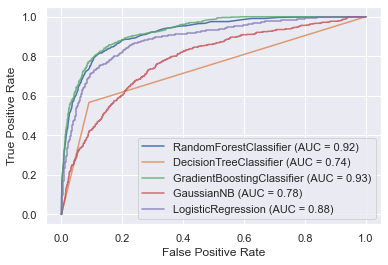

In [56]:
from sklearn.metrics import plot_roc_curve

ran_forest_disp = plot_roc_curve(ran_forest, X_test, y_test)
ax = plt.gca()
dtree_disp = plot_roc_curve(dtree, X_test, y_test, ax=ax, alpha=0.8)
gbk_disp = plot_roc_curve(gbk, X_test, y_test, ax=ax, alpha=0.8)
gaussiannb_disp = plot_roc_curve(gaussiannb, X_test, y_test, ax=ax, alpha=0.8)
logmodel_disp = plot_roc_curve(logmodel, X_test, y_test, ax=ax, alpha=0.8)

Note: AUC in matrix comes from cross validation, plot is working only with test data

From ROC point, we see, that ensemble models got the highest area under curve. With other metrics in mind, we can say the Gradient boosting clasifier is the best overall model, even recall is one of the betters. 

In [57]:
evaluation_matrix.sort_values(by=['AreaUnderCurve'], ascending=False)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
4,GradientBoostingClassifier,n_estimators=500,91.552,90.556,92.473,76.047,57.168,57.020,61.896
3,RandomForestClassifier,n_estimators=250,90.542,90.176,91.594,77.778,51.399,53.612,57.387
7,LogisticRegression,thr=0.2,87.446,87.815,93.902,59.447,67.657,37.262,64.899
6,LogisticRegression,"C=19.1, penalty=l1",86.929,88.195,89.129,76.046,34.965,37.629,41.935
5,GaussianNB,,77.730,74.898,92.502,34.113,66.259,66.938,51.366
2,DecisionTreeClassifier,gini,72.494,85.617,91.945,53.465,56.643,55.186,55.626
1,DummyClassifier,stratified,50.326,72.619,83.783,11.734,11.713,16.142,11.720
0,DummyClassifier,most_frequent,50.000,84.478,84.478,0.000,0.000,0.000,0.000


As the main goal for our model is to find as many customers that generated profit as possible, we don't consider to be false positives that an issue, so we put recall metrics above others. We see that only logistic regression and Naive Bayes were able to classify correctly around the 2/3. We also see the huge tradeoff for precision for Naive Bayes so we exclude it from solution. 

In [58]:
evaluation_matrix.sort_values(by=['True_Recall'], ascending=False)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
7,LogisticRegression,thr=0.2,87.446,87.815,93.902,59.447,67.657,37.262,64.899
5,GaussianNB,,77.730,74.898,92.502,34.113,66.259,66.938,51.366
4,GradientBoostingClassifier,n_estimators=500,91.552,90.556,92.473,76.047,57.168,57.020,61.896
2,DecisionTreeClassifier,gini,72.494,85.617,91.945,53.465,56.643,55.186,55.626
3,RandomForestClassifier,n_estimators=250,90.542,90.176,91.594,77.778,51.399,53.612,57.387
6,LogisticRegression,"C=19.1, penalty=l1",86.929,88.195,89.129,76.046,34.965,37.629,41.935
1,DummyClassifier,stratified,50.326,72.619,83.783,11.734,11.713,16.142,11.720
0,DummyClassifier,most_frequent,50.000,84.478,84.478,0.000,0.000,0.000,0.000


In our case, we would present to the client two models, GradientBoostingClassifier as the overall best model and LogisticRegression that can be tweaked thanks to its probabilistic approach to match their future intentions and false positive rate appetite.

## Bonus Model: Neural Network

### Z - score Scaler - {-1;1}

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scal = sc.fit_transform(df.drop(labels=[TARGET_VARIABLE], axis=1))
X_scal
X_train, X_test, y_train, y_test = train_test_split(X_scal, y, test_size=0.3, random_state=3)

In [60]:
import keras as K
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


### Build ANN model

In [61]:
classifier = Sequential()
#First Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal', input_dim=X_scal.shape[1]))
#Second  Hidden Layer
classifier.add(Dense(12, activation='tanh', kernel_initializer='random_normal'))
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

### Compile NN model

Add validation set to see if the model tends overfit after a while

In [62]:
#Compiling the neural network
classifier.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

### Train model

In [63]:
#Fitting the data to the training dataset
classifier.fit(X_train,y_train, batch_size=10, epochs=25, validation_split=0.2)

Train on 6878 samples, validate on 1720 samples
Epoch 1/25
6878/6878 [==============================] - 0s 70us/step - loss: 0.3888 - accuracy: 0.8622 - val_loss: 0.3045 - val_accuracy: 0.8820
Epoch 2/25
6878/6878 [==============================] - 0s 56us/step - loss: 0.3041 - accuracy: 0.8825 - val_loss: 0.2911 - val_accuracy: 0.8860
Epoch 3/25
6878/6878 [==============================] - 0s 57us/step - loss: 0.2916 - accuracy: 0.8883 - val_loss: 0.2868 - val_accuracy: 0.8866
Epoch 4/25
6878/6878 [==============================] - 0s 56us/step - loss: 0.2787 - accuracy: 0.8875 - val_loss: 0.2767 - val_accuracy: 0.8890
Epoch 5/25
6878/6878 [==============================] - 0s 56us/step - loss: 0.2708 - accuracy: 0.8911 - val_loss: 0.2691 - val_accuracy: 0.8860
Epoch 6/25
6878/6878 [==============================] - 0s 56us/step - loss: 0.2657 - accuracy: 0.8914 - val_loss: 0.2717 - val_accuracy: 0.8849
Epoch 7/25
6878/6878 [==============================] - 0s 56us/step - loss: 0.261

## Optimize probability threshold

In [64]:
y_prod_pred = classifier.predict(X_test)

In [65]:
thresholds = np.arange(0.15, 0.9, 0.05)
for threshold in thresholds:
    y_pred = y_prob_pred > threshold
    print(f'LG with threshold: {threshold}')
    #print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))

LG with threshold: 0.15
              precision    recall  f1-score   support

           0       0.84      0.76      0.80      3105
           1       0.16      0.26      0.20       580

    accuracy                           0.68      3685
   macro avg       0.50      0.51      0.50      3685
weighted avg       0.74      0.68      0.70      3685

LG with threshold: 0.2
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      3105
           1       0.17      0.19      0.18       580

    accuracy                           0.73      3685
   macro avg       0.51      0.51      0.51      3685
weighted avg       0.74      0.73      0.73      3685

LG with threshold: 0.25
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3105
           1       0.15      0.13      0.14       580

    accuracy                           0.75      3685
   macro avg       0.50      0.50      0.50      3685
wei

In [66]:
threshold = 0.35

# Get probabilities for Revenue = 1
y_prob_pred = classifier.predict(X_test)
y_pred = y_prob_pred > threshold

evaluate_model("ANN - Keras",y_test,y_pred,f'thr={threshold}')
evaluation_matrix.tail(1)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
8,ANN - Keras,thr=0.35,NaN,88.195,94.949,60.14,74.138,NaN,69.183


### Evaluation of Bonus Model

We can see that the neural network improved in comparison to LR with optimized threshold in all tracked metrics. We increased the recall and lowered the false positive rate for class Revenue = 1. 

In [67]:
evaluation_matrix.sort_values(by=['True_Recall'], ascending=False)

,Model,EvaluationInfo,AreaUnderCurve,Accuracy,False_Precision,True_Precision,True_Recall,True_Recall_CV,True_F1_Score
8,ANN - Keras,thr=0.35,NaN,88.195,94.949,60.140,74.138,NaN,69.183
7,LogisticRegression,thr=0.2,87.446,87.815,93.902,59.447,67.657,37.262,64.899
5,GaussianNB,,77.730,74.898,92.502,34.113,66.259,66.938,51.366
4,GradientBoostingClassifier,n_estimators=500,91.552,90.556,92.473,76.047,57.168,57.020,61.896
2,DecisionTreeClassifier,gini,72.494,85.617,91.945,53.465,56.643,55.186,55.626
3,RandomForestClassifier,n_estimators=250,90.542,90.176,91.594,77.778,51.399,53.612,57.387
6,LogisticRegression,"C=19.1, penalty=l1",86.929,88.195,89.129,76.046,34.965,37.629,41.935
1,DummyClassifier,stratified,50.326,72.619,83.783,11.734,11.713,16.142,11.720
0,DummyClassifier,most_frequent,50.000,84.478,84.478,0.000,0.000,0.000,0.000
